In [1]:
import cobra
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
model = cobra.io.read_sbml_model('/home/student/Downloads/new_thecaphora.xml')
model.reactions.BIOMASS.objective_coefficient=1
model

'' is not a valid SBML 'SId'.


Name,
Memory address,0x07fe9c1f40cd0
Number of metabolites,2332
Number of reactions,3394
Number of groups,0
Objective expression,1.0*BIOMASS - 1.0*BIOMASS_reverse_69053
Compartments,"CYTOSOL, PERIPLASM, EXTRACELLULAR"


# FBA

In [2]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,3.642919e-17
1.1.1.178-RXN_c,0.0,1.561251e-17
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,1.561251e-17
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


In [3]:

lower_bound_liste = np.linspace(-50,0,100)

for i in lower_bound_liste:
    model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound = i
    model.optimize()
    print(model.reactions.BIOMASS.flux)
    #print(model.reactions.__getattr__('EX_PROTON_e').flux)
    #print(model.reactions.EX_o2_e.lower_bound)

0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5199176284102954
0.5190119934015421
0.5177947982950653
0.5165776031885889
0.5153604080821126
0.5141432129756365
0.5129260178691594
0.5117088227626831
0.510491627656207
0.5092744325497305
0.5080572374432542
0.5068400423367794
0.5056228472303046
0.5044056521238259
0.5031884570173517
0.5019712619108745
0.5007540668044013
0.49953687169792055
0.49831967659144516
0.4971024814849687
0.49588528637849205
0.4946680912720141
0.4934508961655388
0.49223370105906394
0.4910165

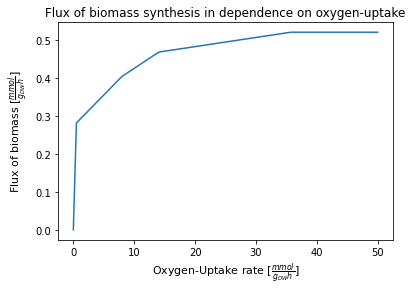

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xs = lower_bound_liste
ys = []
for i in xs:
    model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound = i
    model.optimize()
    #y= model.reactions.__getattr__('EX_WATER_e').flux
    y = model.reactions.BIOMASS.flux
    ys.append(y)
new_xs=xs*-1
plt.title('Flux of biomass synthesis in dependence on oxygen-uptake', fontsize=12)
plt.plot(new_xs,ys )
plt.xlabel(r'Oxygen-Uptake rate [$\frac{mmol }{g_{DW} h}$]', fontsize=11)
plt.ylabel(r'Flux of biomass [$\frac{mmol }{g_{DW} h}$]', fontsize=11)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/Flux of biomass dependent on oxygen.pdf', bbox_inches="tight")
plt.show()

In [5]:
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt

In [6]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-3.247710e-16
1.1.1.127-RXN_c,0.0,-4.440892e-16
1.1.1.178-RXN_c,0.0,-4.440892e-16
1.1.1.190-RXN_c,0.0,4.440892e-16
1.1.1.210-RXN_c,0.0,-8.881784e-16
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,1.169882e-15


In [7]:
model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound = -1000

In [8]:
model.optimize()

,fluxes,reduced_costs
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,-1.733059e-02
1.1.1.127-RXN_c,0.0,4.336809e-18
1.1.1.178-RXN_c,0.0,0.000000e+00
1.1.1.190-RXN_c,0.0,-1.733059e-02
1.1.1.210-RXN_c,0.0,4.336809e-18
...,...,...
TR_P-AMINO-BENZOATE_c_e,0.0,0.000000e+00
EX_P-AMINO-BENZOATE_e,0.0,0.000000e+00
TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.0,-0.000000e+00
EX_4-AMINO-4-DEOXYCHORISMATE_e,0.0,-2.599588e-02


# FVA

In [9]:
fva=cobra.flux_analysis.flux_variability_analysis(model, model.reactions[:3394])
fva.head()

,minimum,maximum
1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.0,1.745035e-11
1.1.1.127-RXN_c,0.0,0.000000e+00
1.1.1.178-RXN_c,0.0,0.000000e+00
1.1.1.190-RXN_c,0.0,1.745035e-11
1.1.1.210-RXN_c,0.0,0.000000e+00


# 1. FVA zum Überblick

In [10]:
#Baue Dataframe für den Plot

namesM=list(fva.index)
minM=np.array(list(fva['minimum']))
maxM=np.array(list(fva['maximum']))
n=len(namesM)
#filtere Null Intervalle
names=[]
minimum=[]
maximum=[]

# Messfehler sorgen fr schwankungen in den Daten, sodass auch 'gleiche' Werte sich leiht unterscheiden
#eps=1e-10# Dieser Parameter gibt an ab welcher Distanz die differenz zweier werte als nicht Null gewertet werden soll

eps=5

for i in range(n):
#     if abs(minM[i])>eps and abs(maxM[i])>eps:
    # if abs(minM[i])>eps and abs(maxM[i])>eps:# and maxM[i]+minM[i]<0.1:
     #   if maxM[i]!=1000 and minM[i]!=-1000:
            names.append(namesM[i])
            minimum.append(minM[i])
            maximum.append(maxM[i])

df = panda.DataFrame()
df['names']=names
df['minimum']= minimum
df['maximum']= maximum
#df=np.array(list(fva['minimum']))
df

,names,minimum,maximum
0,1-PHOSPHATIDYLINOSITOL-KINASE-RXN__var__0_c,0.000000e+00,1.745035e-11
1,1.1.1.127-RXN_c,0.000000e+00,0.000000e+00
2,1.1.1.178-RXN_c,0.000000e+00,0.000000e+00
3,1.1.1.190-RXN_c,0.000000e+00,1.745035e-11
4,1.1.1.210-RXN_c,0.000000e+00,0.000000e+00
...,...,...,...
3389,TR_P-AMINO-BENZOATE_c_e,-1.457385e-12,1.399769e-12
3390,EX_P-AMINO-BENZOATE_e,-1.457385e-12,1.399769e-12
3391,TR_4-AMINO-4-DEOXYCHORISMATE_c_e,0.000000e+00,1.244239e-12
3392,EX_4-AMINO-4-DEOXYCHORISMATE_e,0.000000e+00,1.244239e-12


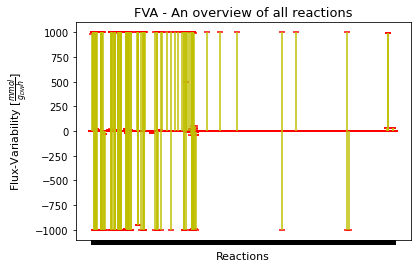

In [11]:
#Plotte # Wir benutzen Scatter Plots um die min und Max Punkte für jede Messung zu Plotten
plt.scatter(x='names',y='minimum',data=df,color='r',marker='_')
plt.scatter(x='names',y='maximum',data=df,color='r',marker='_')
# Die Line Realisieren wir mit Hilfe der Funktion vlines
plt.vlines(x='names',ymin='minimum',ymax='maximum',data=df,color='y')

plt.title('FVA - An overview of all reactions', fontsize=13)
plt.setp(plt.gca(),'xticklabels',[])
plt.xlabel('Reactions', fontsize=11)
plt.ylabel(r'Flux-Variability [$\frac{mmol }{g_{DW} h}$]', fontsize=11)
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/FVA.pdf', bbox_inches="tight")
plt.show()

# 2. FVA mit unverzichtbaren Flüssen (ohne tote und sehr variable Flüsse (Grenze von -1000 bis 1000))

In [12]:
#Baue Dataframe für den Plot

namesM=list(fva.index)
minM=np.array(list(fva['minimum']))
maxM=np.array(list(fva['maximum']))
n=len(namesM)
#filtere Null Intervalle
names=[]
minimum=[]
maximum=[]

# Messfehler sorgen fr schwankungen in den Daten, sodass auch 'gleiche' Werte sich leiht unterscheiden
#eps=1e-10# Dieser Parameter gibt an ab welcher Distanz die differenz zweier werte als nicht Null gewertet werden soll

eps=2

for i in range(n):
#     if abs(minM[i])>eps and abs(maxM[i])>eps:
    if abs(minM[i])>eps and abs(maxM[i])>eps:# and maxM[i]+minM[i]<0.1:
         if abs(maxM[i])<990 and abs(minM[i])<990:
            names.append(namesM[i])
            minimum.append(minM[i])
            maximum.append(maxM[i])

df = panda.DataFrame()
df['names']=names
df['minimum']= minimum
df['maximum']= maximum
df = df[df['names']!='TR_WATER_c_e']
df = df[df['names']!='EX_WATER_e']
#df=np.array(list(fva['minimum']))
#plt.savetable('/home/student/Documents/bachelorarbeit/thesis/table_df.pdf', bbox_inches="tight")
df

,names,minimum,maximum
0,2PGADEHYDRAT-RXN_c,18.236227,18.236227
1,6PFRUCTPHOS-RXN_c,9.176261,9.176261
2,ATPSYN-RXN_c_p,-24.522163,-24.522163
3,F16ALDOLASE-RXN_c,9.176261,9.176261
4,HOMOCITRATE-SYNTHASE-RXN_c,11.356001,11.356001
5,KETOGLUTREDUCT-RXN_c,11.182635,11.182635
6,PEPDEPHOS-RXN_c,17.852270,17.852270
7,PHOSGLYPHOS-RXN_c,-18.236227,-18.236227
8,PYRUVATE-CARBOXYLASE-RXN_c,2.582978,2.582978
9,PYRUVDEH-RXN_c,13.733676,13.733676


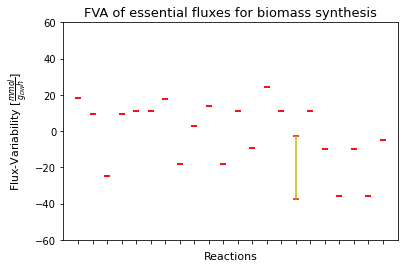

In [13]:
#Plotte # Wir benutzen Scatter Plots um die min und Max Punkte für jede Messung zu Plotten
df = df[df['names']!='TR_WATER_c_e']
df = df[df['names']!='EX_WATER_e']

plt.scatter(x='names',y='minimum',data=df,color='r',marker='_')
plt.scatter(x='names',y='maximum',data=df,color='r',marker='_')
# Die Line Realisieren wir mit Hilfe der Funktion vlines
plt.vlines(x='names',ymin='minimum',ymax='maximum',data=df,color='y')

plt.ylim(-60,60)
plt.title('FVA of essential fluxes for biomass synthesis', fontsize=13)
plt.xlabel('Reactions', fontsize=11)
plt.ylabel(r'Flux-Variability [$\frac{mmol }{g_{DW} h}$]', fontsize=11)
plt.setp(plt.gca(),'xticklabels',[])
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/FVA of essential fluxes.pdf', bbox_inches="tight")
plt.show()

In [14]:
w=[]
for i in names:
    if i!='TR_WATER_c_e' and i !='EX_WATER_e':
        w.append(i)
print(w)

['2PGADEHYDRAT-RXN_c', '6PFRUCTPHOS-RXN_c', 'ATPSYN-RXN_c_p', 'F16ALDOLASE-RXN_c', 'HOMOCITRATE-SYNTHASE-RXN_c', 'KETOGLUTREDUCT-RXN_c', 'PEPDEPHOS-RXN_c', 'PHOSGLYPHOS-RXN_c', 'PYRUVATE-CARBOXYLASE-RXN_c', 'PYRUVDEH-RXN_c', 'RXN-15513_c', 'RXN-21282_c', 'TRIOSEPISOMERIZATION-RXN_c', 'RXN1YI0-15__var__0_c_p', 'RXN-7970_c', 'RXN0-5224_c', 'RXN-13722_c', 'TR_ALPHA-GLUCOSE_c_e', 'TR_OXYGEN-MOLECULE_c_e', 'EX_ALPHA-GLUCOSE_e', 'EX_OXYGEN-MOLECULE_e', 'EX_Pi_e']


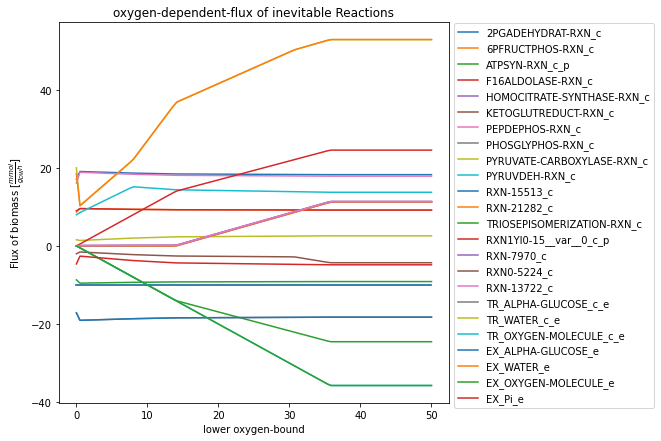

In [15]:
size= 1
fig, plots= plt.subplots(size,sharex=True, figsize=(7, 7))

for n, name in enumerate(names):
    xs = lower_bound_liste
    ys = []
    for i in xs:
        model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound = i
        model.optimize()
        y = model.reactions.__getattr__(name).flux
        ys.append(y)
    model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound=0
    new_xs=xs*-1
    plt.title('oxygen-dependent-flux of inevitable Reactions')
    plt.plot(new_xs,ys,label=name)
plt.xlabel('lower oxygen-bound')
plt.ylabel(r'Flux of biomass [$\frac{mmol }{g_{DW} h}$]')
plt.legend(bbox_to_anchor =(1, 1, 0.01, 0.01))
fig.subplots_adjust(hspace=0.5)

plt.show()

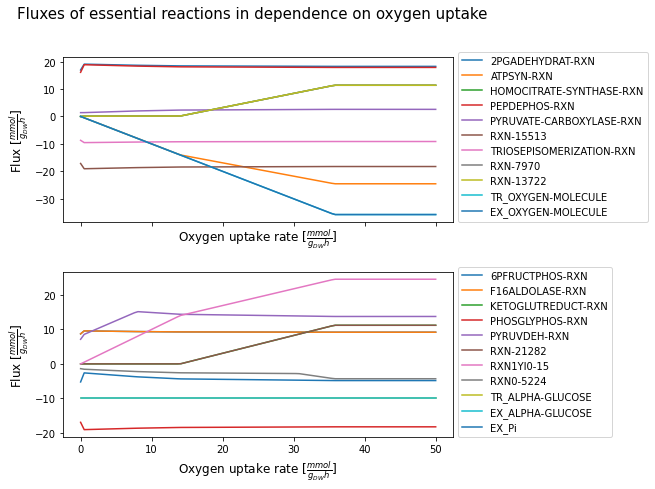

In [16]:
size= 2
fig, plots= plt.subplots(size,sharex=True, figsize=(7, 7))

for n, name in enumerate(w):
    xs = lower_bound_liste
    ys = []
    for i in xs:
        model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound = i
        model.optimize()
        y = model.reactions.__getattr__(name).flux
        ys.append(y)
    model.reactions.__getattr__('EX_OXYGEN-MOLECULE_e').lower_bound=0
    new_xs=xs*-1
    #plt.title('oxygen-dependent-flux of inevitable Reactions')
    name=name.replace('_c','')
    name=name.replace('_p','')
    name=name.replace('_e','')
    name=name.replace('__var__0','')
    plots[n%size].plot(new_xs,ys,label=name)
    #plt.plot(new_xs,ys,label=name)
        #plt.legend(loc='upper right')
plots[0].set_xlabel(r'Oxygen uptake rate [$\frac{mmol }{g_{DW} h}$]', fontsize=12)
#plt.xlabel('lower oxygen-bound')
plots[1].set_xlabel(r'Oxygen uptake rate [$\frac{mmol }{g_{DW} h}$]', fontsize=12)
#plots[0].xticks(False)
plots[0].set_ylabel(r'Flux [$\frac{mmol }{g_{DW} h}$]', fontsize=12)
#plt.ylabel('Flux of biomass [$\frac{mmol }{g_{DW} h}$]', fontsize=14)
plots[1].set_ylabel(r'Flux [$\frac{mmol }{g_{DW} h}$]', fontsize=12)
#plots[2].set_ylabel('Flux [$\frac{mmol }{g_{DW} h}$]')
#plt.legend(bbox_to_anchor =(1, 1, 0.01, 0.01))
plots[0].legend(bbox_to_anchor =(1, 1.05, 0.2, 0.01))
plots[1].legend(bbox_to_anchor =(1, 1.05, 0.2, 0.01))
#plots[2].legend(bbox_to_anchor =(1, 1.2, 0.01, 0.01))

fig.suptitle('Fluxes of essential reactions in dependence on oxygen uptake', fontsize= 15)
fig.subplots_adjust(hspace=0.3)
#fig.tight_layout()
plt.savefig('/home/student/Documents/bachelorarbeit/thesis/oxygen-dependent-flux of inevitable reactions.pdf', bbox_inches="tight")
plt.show()